In [1]:
# Array manipulation
import numpy as np

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Generate donut data

/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-15.0, 15.0, -15.0, 15.0)

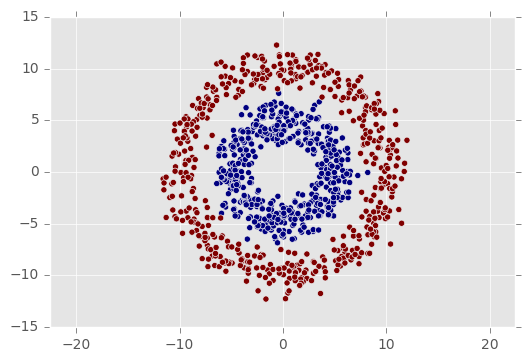

In [2]:
# Number of samples
n = 1000
# Number of features
d = 2

# Define radius of donuts
r_inner = 5
r_outter = 10

# Get points in polar cordinates
r1 = np.random.randn(n/2) + r_inner
theta = 2 * np.pi * np.random.random(n/2)
# Transform to rectangular cordinates
X_inner = np.concatenate([[r1 * np.cos(theta)], [r1 * np.sin(theta)]]).T

# Get points in polar cordinates
r2 = np.random.randn(n/2) + r_outter
theta = 2 * np.pi * np.random.random(n/2)
# Transform to rectangular cordinates
X_outer = np.concatenate([[r2 * np.cos(theta)], [r2 * np.sin(theta)]]).T

# Join all points
X = np.concatenate([X_inner, X_outer])
# Outer circles have 1 as target
T = np.zeros(X.shape[0])
T[500:] = 1

# Plot points
plt.scatter(X[:, 0], X[:, 1], c = T)
plt.axis('equal')

In [3]:
# Create a column for the bias
ones_bias = np.ones([X.shape[0], 1])
# Create a column for the radius
r = np.linalg.norm(X, axis = 1)
r = r.reshape(r.shape[0], -1)

# Add the new features (bias, radius, older features)
Xb = np.concatenate([ones_bias, r, X], axis = 1)

Helper function for visualizing decision boundaries

In [4]:
def visualize(W):
    x = np.arange(-15, 15.1, 0.1)
    y = np.arange(-15, 15.1, 0.1)
    xx, yy = np.meshgrid(x, y)
    pred_area = np.c_[xx.ravel(), yy.ravel()]

    # Vector of ones for bias
    ones = np.ones([np.product(xx.shape), 1])
    # Calculate radius
    r = np.linalg.norm(pred_area, axis = 1)
    r = r.reshape(r.shape[0], -1)

    pred_area = np.concatenate((ones, r, pred_area), axis = 1)

    pred = np.round(sigmoid(pred_area.dot(W)))

    pred = pred.reshape(xx.shape)

    # Plot decision boundaries
    plt.pcolormesh(xx, yy, pred, cmap = 'seismic')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c = T)

    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.show()
    
    return

# Contruct the logistic regression model

In [5]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [6]:
def cross_entropy(T, Y):
    # If T = 0, fake_label = 1 - Y ; if T = 1, fake_label = Y
    fake_label = Y.copy()
    fake_label[T == 0] = 1 - fake_label[T == 0]    
  
    return -np.sum(np.log(fake_label))   

In [7]:
# Hyperparameters
steps = 400
learning_rate = 0.0001
regularization_factor = 0.1

# Vector for plotting cost
costs = []

In [ ]:
# Initialize random weights
W = np.random.randn(Xb.shape[1])

# Feed foward
Y = sigmoid(Xb.dot(W))

Cross entropy: 4130.553536


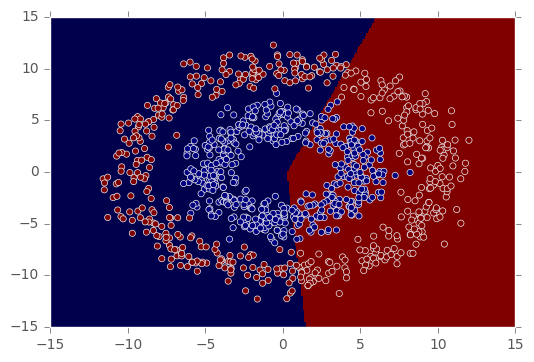

Cross entropy: 589.486659129


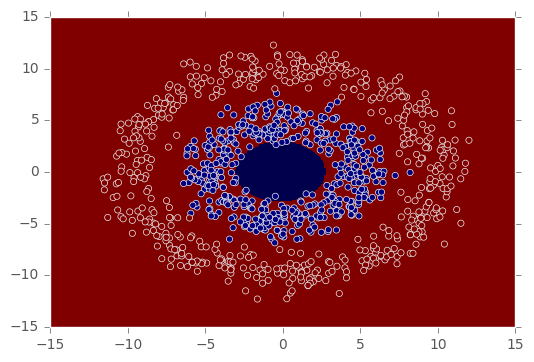

Cross entropy: 570.058220836


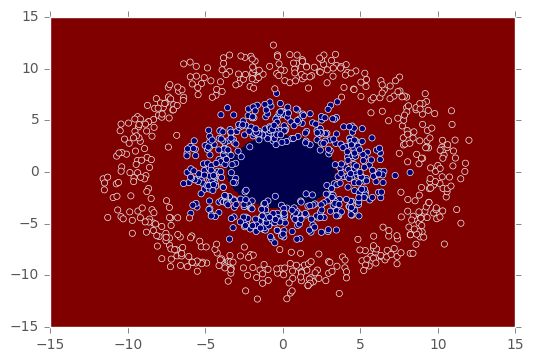

Cross entropy: 551.967186302


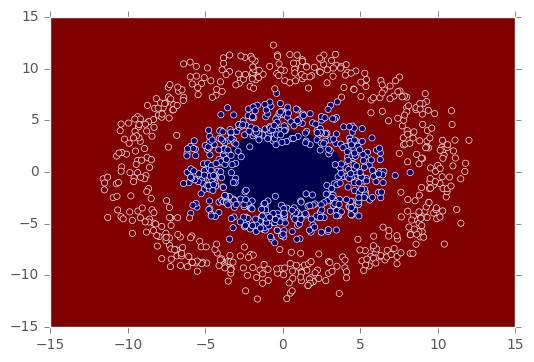

Cross entropy: 534.829072325


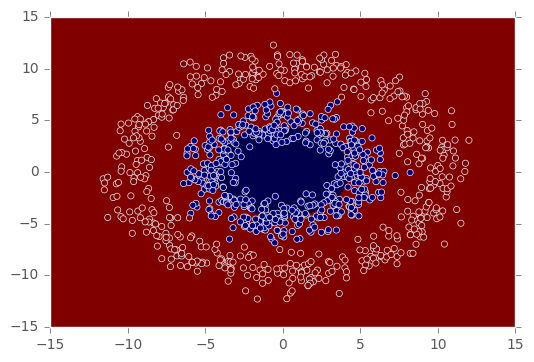

Cross entropy: 518.589540326


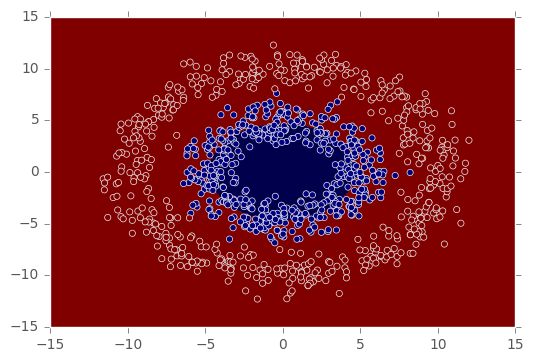

Cross entropy: 503.196326513


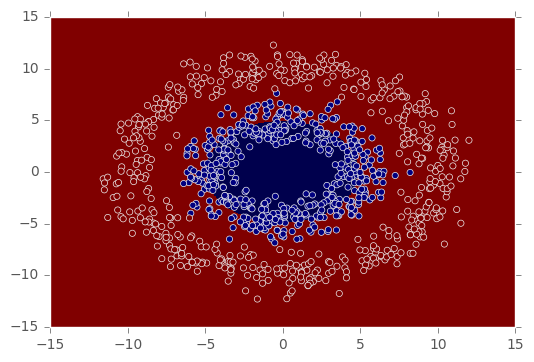

Cross entropy: 488.599424955


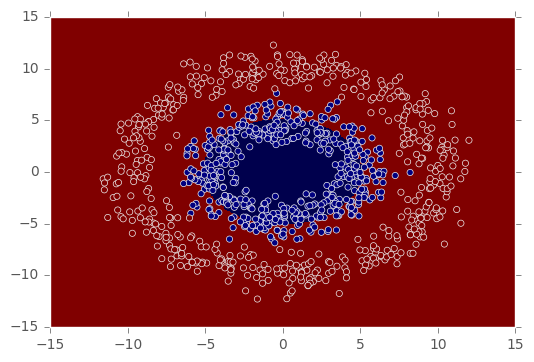

Cross entropy: 474.75120499


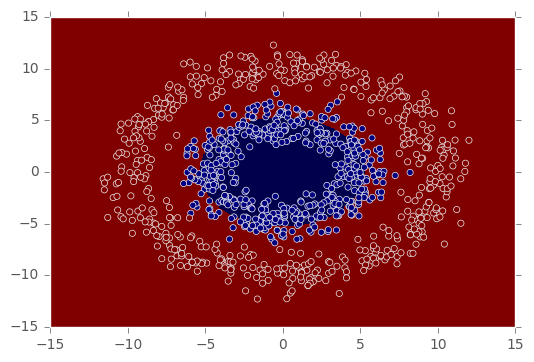

Cross entropy: 461.606473329


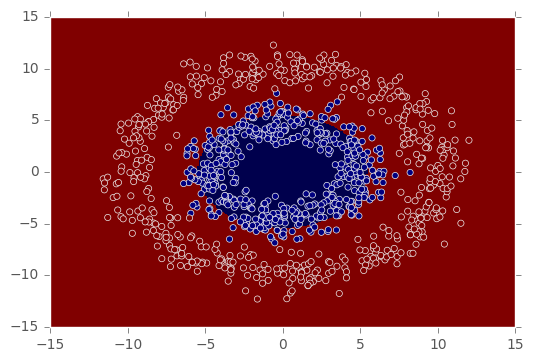

Cross entropy: 449.122490619


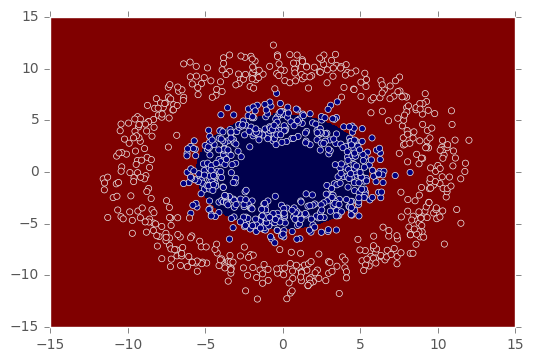

Cross entropy: 437.258951413


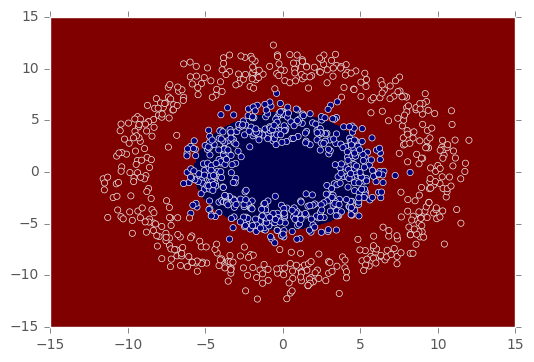

Cross entropy: 425.97793546


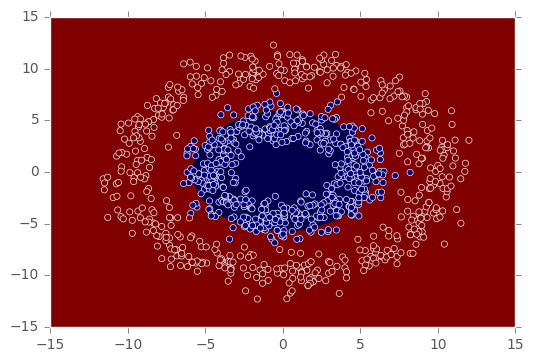

Cross entropy: 415.243837217


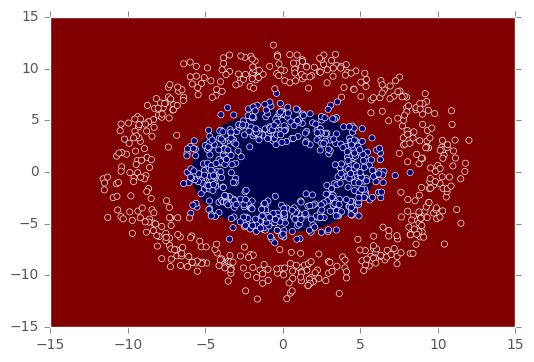

Cross entropy: 405.023279433


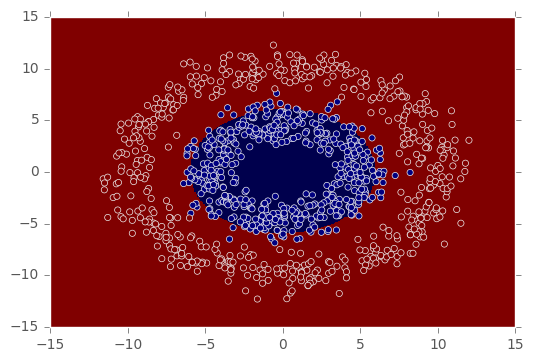

Cross entropy: 395.2850157


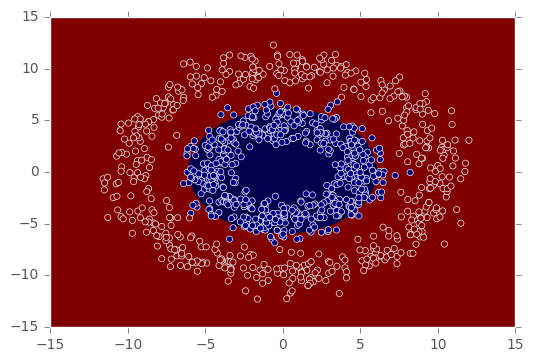

Cross entropy: 385.999825976


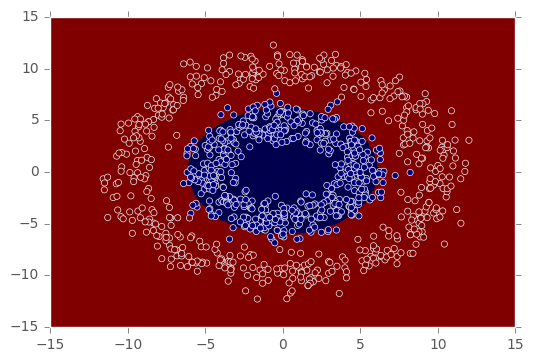

Cross entropy: 377.140408318


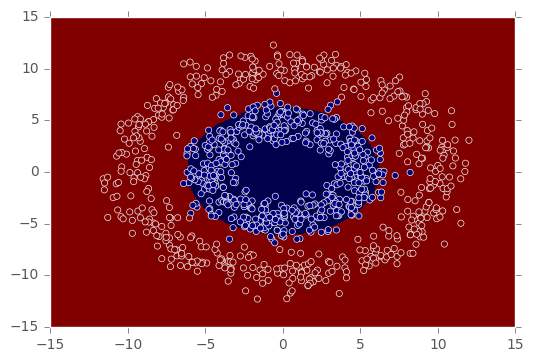

Cross entropy: 368.681269376


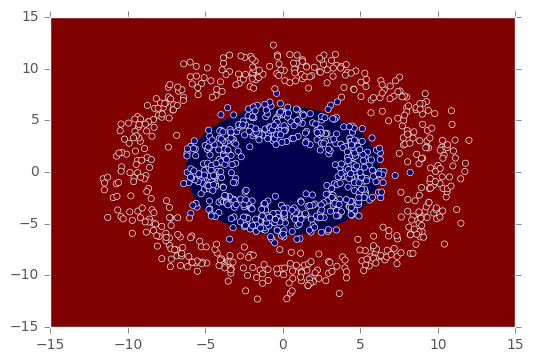

Cross entropy: 360.598615622


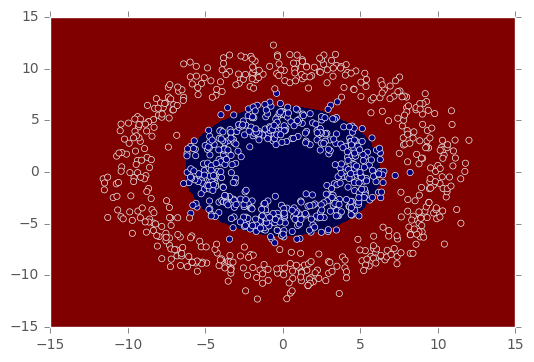

Cross entropy: 352.87024682


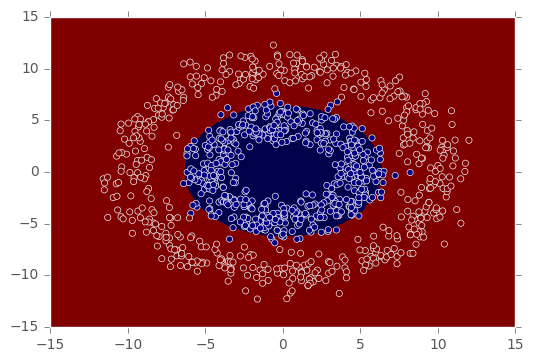

Cross entropy: 345.475452833


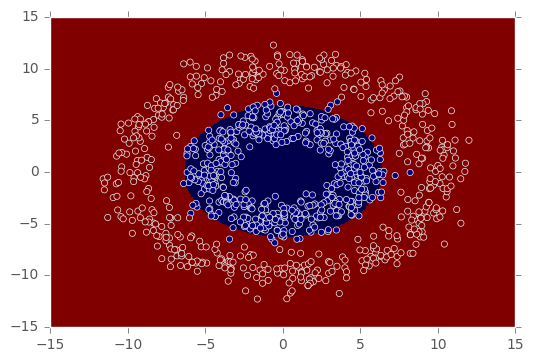

Cross entropy: 338.39491454


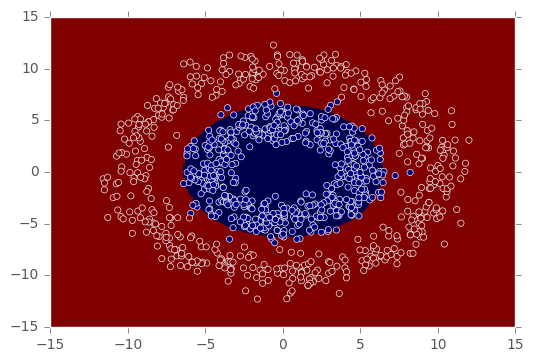

Cross entropy: 331.61060939


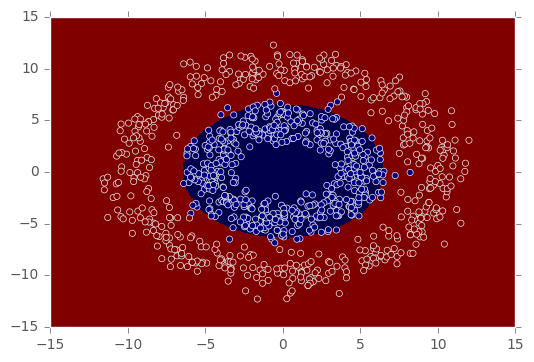

Cross entropy: 325.105721886


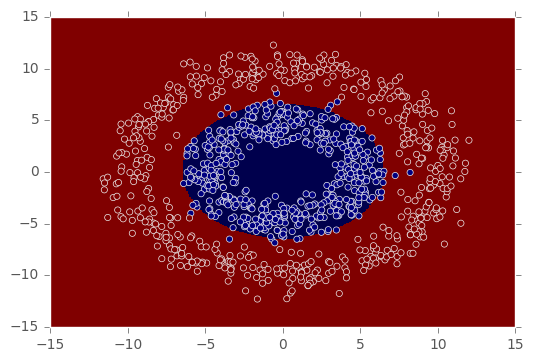

Cross entropy: 318.864559175


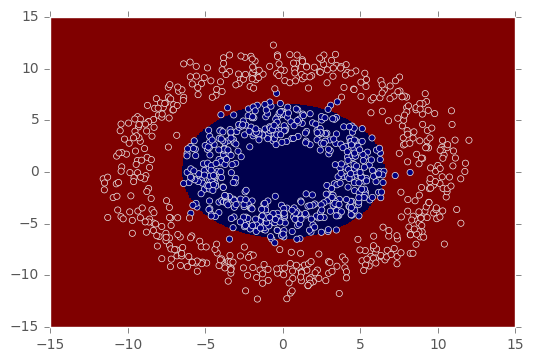

Cross entropy: 312.87247175


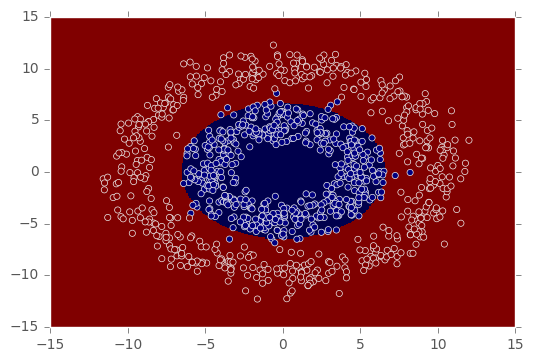

Cross entropy: 307.115779209


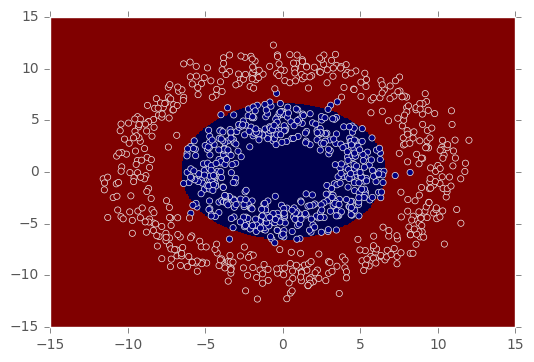

Cross entropy: 301.581700944


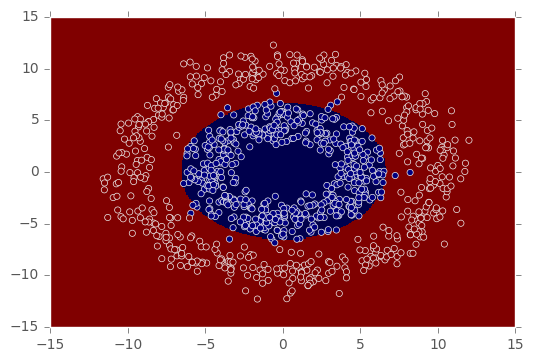

Cross entropy: 296.258291566


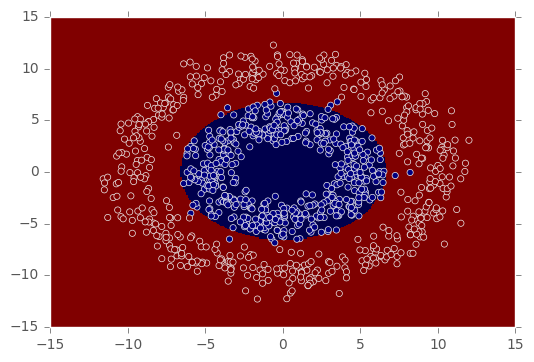

Cross entropy: 291.13438087


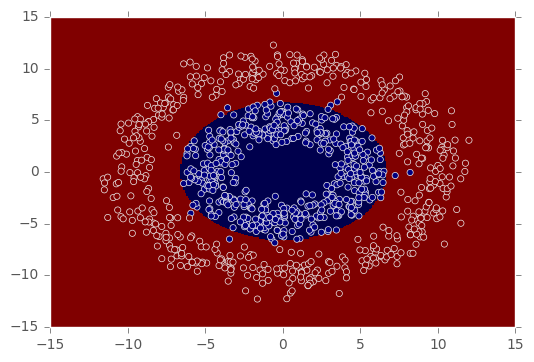

Cross entropy: 286.199518094


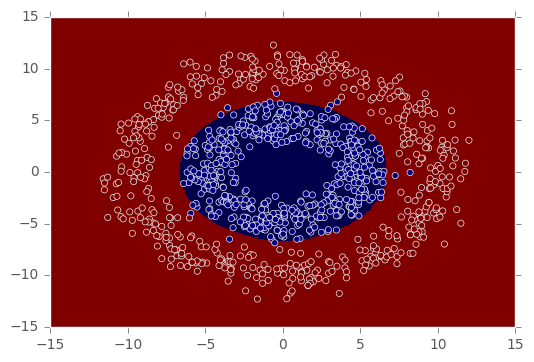

Cross entropy: 281.443920231


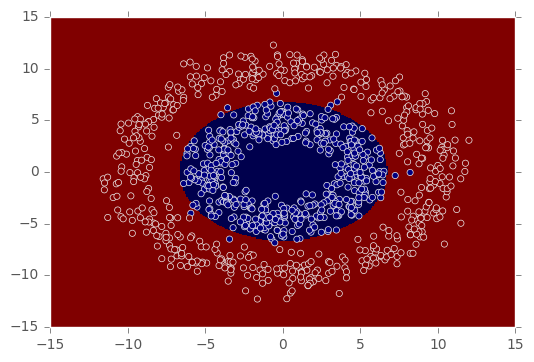

Cross entropy: 276.858424156


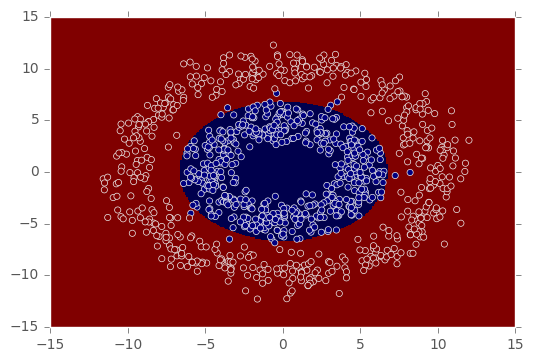

Cross entropy: 272.434442305


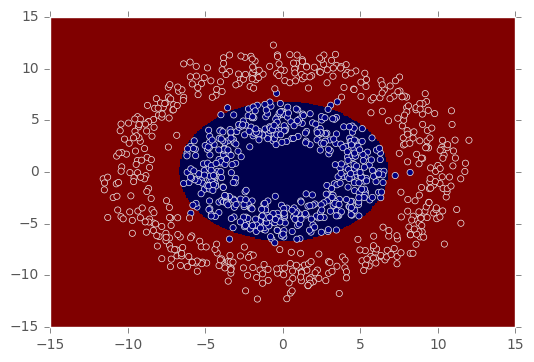

Cross entropy: 268.163921679


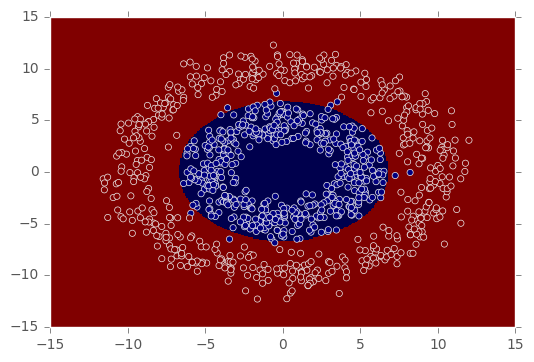

In [ ]:
for step in range(steps):
    # Calculate cross entropy
    cost = cross_entropy(T, Y)
    costs.append(cost)
    
    # Perform gradient descent
    W -= learning_rate * ((Y - T).dot(Xb) + regularization_factor * W)

    # Recalculate Y
    Y = sigmoid(Xb.dot(W))    
    
    if step % 10 == 0:
        print('Cross entropy:', cost)
        visualize(W)

print('Final weights:', W)

In [ ]:
# Plot cross entropy over all interactions
plt.plot(costs)